In [1]:
import pandas as pd 
import numpy as np
import math
import matplotlib.pyplot as plt
from numpy import *

# Question1

In [2]:
S0,T,sigma,r,rs=1,100,1.2/250**0.5,0.0002,0.000082

In [3]:
t=T/100

## Monte Carlo Simulation pricing coins A and B

In [4]:
net_value_a=[]
net_value_b=[]
for m in range(10):
    np.random.seed(11)
    BM=[]
    for i in range(100):
        BMs=np.random.normal(0,1,1)
        BM.append(BMs)
    returna=[]
    S0=1
    S=[S0]
    for i in range(99):
        if S0>=1.5+r*i/2:
            returna.append(i)
            S0=1
        elif S0<=0.625+r*i/2:
            returna.append(i)
            S0=1
        else:
            S0=S0*math.exp((r-0.5*sigma*sigma)*t+math.sqrt(t)*sigma*BM[i])
        S.append(S0)
    if returna==[]:
        npv_a=math.exp(-rs*T)*(r*T+1)
        npv_b=math.exp(-rs*T)*(2*S[99]-1-r*T)
    else:
        npv_a_new=[]
        npv_b_new=[]
        num=len(returna)
        if num!=1:
            if S[returna[0]]>=1.5:
                npv_a1=math.exp(-rs*returna[0])*r*returna[0]
                npv_b1=math.exp(-rs*returna[0])*(2*S[returna[0]]-1-r*returna[0])
            else:
                npv_a1=math.exp(-rs*returna[0])*(r*returna[0]+0.75)
                npv_b1=0
            npv_a_new.append(npv_a1)
            npv_b_new.append(npv_b1)
            for i in range(1,num):
                if S[returna[i]]>=1.5:
                    npv_a1=math.exp(-rs*returna[i])*r*(returna[i]-returna[i-1])
                    npv_b1=math.exp(-rs*returna[i])*(2*S[returna[i]]-2-r*(returna[i]-returna[i-1]))
                else:
                    npv_a1=math.exp(-r*(returna[i])*(r*(returna[i]-returna[i-1])+0.75))
                    npv_b1=0
                npv_a_new.append(npv_a1)
                npv_b_new.append(npv_b1)
        npv_a=sum(npv_a_new)+(0.25+r*(100-returna[num-1]))*math.exp(-rs*T)
        npv_b=sum(npv_b_new)+(2*S[99]-1.25-r*(100-returna[num-1]))*math.exp(-rs*T)
        if num==1:
            if S[returna[0]]>=1.5:
                npv_a1=math.exp(-rs*returna[0])*r*returna[0]
                npv_b1=math.exp(-rs*returna[0])*(2*S[0]-2-r*returna[0])
            else:
                npv_a1=math.exp(-rs*returna[0])*(r*returna[0]+0.75)
                npv_b1=0
            npv_a_new.append(npv_a1)
            npv_b_new.append(npv_b1)
        npv_a=sum(npv_a_new)+(0.25+r*(100-returna[num-1]))*math.exp(-rs*T)
        npv_b=sum(npv_b_new)+(2*S[99]-1.25-r*(100-returna[num-1]))*math.exp(-rs*T)
    net_value_a.append(npv_a)
    net_value_b.append(npv_b)
net_value_a=np.mean(net_value_a)
net_value_b=np.mean(net_value_b)

In [5]:
net_value_a

1.0147772731564741

In [6]:
net_value_b

1.298327670242983

## Plot function

In [7]:
np.random.seed(11)
BM=[]
for i in range(100):
    BMs=np.random.normal(0,1,1)
    BM.append(BMs)
returna=[]
S0=1
S=[S0]
for i in range(99):
    if S0>=1.5+r*i/2:
        returna.append(i)
        S0=1
    elif S0<=0.625+r*i/2:
        returna.append(i)
        S0=1
    else:
        S0=S0*math.exp((r-0.5*sigma*sigma)*t+math.sqrt(t)*sigma*BM[i])
    S.append(S0)
returna

[50, 75]

In [8]:
value_a=[]
for i in range(49):
    avalues=1+r*i
    value_a.append(avalues)
value_a.append(1)
for i in range(24):
    avalues=1+r*i
    value_a.append(avalues)
value_a.append(1)
for i in range(25):
    avalues=1+r*i
    value_a.append(avalues)
value_b=[]
for i in range(100):
    bvalues=2*S[i]-value_a[i]
    value_b.append(bvalues)

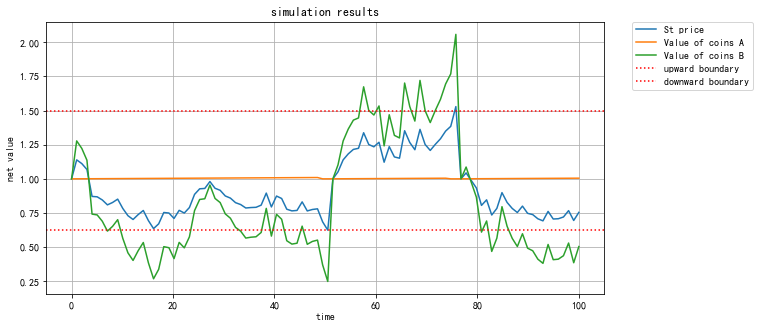

In [9]:
plt.rcParams['figure.figsize'] = (10.0, 5.0)
fig, ax = plt.subplots() 
x = np.linspace(0,100,100) 
ax.plot(x, S, label="St price") 
ax.plot(x, value_a, label="Value of coins A") 
ax.plot(x, value_b, label="Value of coins B") 
ax.set_xlabel('time') 
ax.set_ylabel('net value') 
ax.set_title('simulation results') 
plt.axhline(y=1.5,c="r",ls=':',label="upward boundary")
plt.axhline(y=0.625,c="r",ls=':',label="downward boundary")
ax.legend(bbox_to_anchor=(1.05, 0.75), loc=3, borderaxespad=0) 
ax.grid(True)
plt.show()

# Questin2

## jump risk

In [10]:
np.random.seed(11)
jump=[]
for i in range(100):
    d = np.random.choice([1,0.2], p=[0.8, 0.2])
    jump.append(d)
    

In [11]:
BM=[]
np.random.seed(11)
for i in range(100):
    BMs=np.random.normal(0,1,1)
    BM.append(BMs)
returna=[]
S0=1
S=[S0]
for i in range(99):
    if S0>=1.5+r*i/2:
        returna.append(i)
        S0=1
    elif S0<=0.625+r*i/2:
        returna.append(i)
        S0=1
    else:
        S0=S0*jump[i]*math.exp((r-0.5*sigma*sigma)*t+math.sqrt(t)*sigma*BM[i])
    S.append(S0)
returna

[9, 13, 22, 32, 36, 48, 62, 65, 68, 70, 73, 88, 90]

In [12]:
if returna==[]:
    npv_a=math.exp(-rs*T)*(r*T+1)
    npv_b=math.exp(-rs*T)*(2*S[99]-1-r*T)
else:
    npv_a=[]
    npv_b=[]
    num=len(returna)
    if num!=1:
        if S[returna[0]]>=1.5:
            npv_a1=math.exp(-rs*returna[0])*r*returna[0]
            npv_b1=math.exp(-rs*returna[0])*(2*S[returna[0]]-1-r*returna[0])
        else:
            npv_a1=math.exp(-rs*returna[0])*(r*returna[0]+0.75)
            npv_b1=0
        npv_a.append(npv_a1)
        npv_b.append(npv_b1)
        for i in range(1,num):
            if S[returna[i]]>=1.5:
                npv_a1=math.exp(-rs*returna[i])*r*(returna[i]-returna[i-1])
                npv_b1=math.exp(-rs*returna[i])*(2*S[returna[i]]-2-r*(returna[i]-returna[i-1]))
            else:
                npv_a1=math.exp(-r*(returna[i])*(r*(returna[i]-returna[i-1])+0.75))
            npv_a.append(npv_a1)
            npv_b.append(npv_b1)
    npv_a_0=sum(npv_a)+(0.25+r*(100-returna[num-1]))*math.exp(-rs*T)
    npv_b_0=sum(npv_b)+(2*S[99]-2-r*(100-returna[num-1]))*math.exp(-rs*T)
    if num==1:
        if S[returna[0]]>=1.5:
            npv_a1=math.exp(-rs*returna[0])*r*returna[0]
            npv_b1=math.exp(-rs*returna[0])*(2*S[0]-2-r*returna[0])
        else:
            npv_a1=math.exp(-rs*returna[0])*(r*returna[0]+0.75)
            npv_b1=0
        npv_a.append(npv_a1)
        npv_b.append(npv_b1)
    npv_a_0=sum(npv_a)+(0.25+r*(100-returna[num-1]))*math.exp(-rs*T)
    npv_b_0=sum(npv_b)+(2*S[99]-1-r*(100-returna[num-1]))*math.exp(-rs*T)
npv_jump_a=mean(npv_a)
npv_jump_b=2*np.mean(S)-npv_jump_a

In [13]:
npv_jump_a

0.9731933964147328

In [14]:
npv_jump_b

0.8604024777332315

In [15]:
value_a=[]
for i in range(8):
    avalues=1+r*i
    value_a.append(avalues)
value_a.append(1)
for i in range(3):
    avalues=1+r*i
    value_a.append(avalues)
value_a.append(1)
for i in range(8):
    avalues=1+r*i
    value_a.append(avalues)
value_a.append(1)
for i in range(9):
    avalues=1+r*i
    value_a.append(avalues)
value_a.append(1)
for i in range(3):
    avalues=1+r*i
    value_a.append(avalues)
value_a.append(1)
for i in range(11):
    avalues=1+r*i
    value_a.append(avalues)
value_a.append(1)
for i in range(13):
    avalues=1+r*i
    value_a.append(avalues)
value_a.append(1)
for i in range(2):
    avalues=1+r*i
    value_a.append(avalues)    
value_a.append(1)
for i in range(2):
    avalues=1+r*i
    value_a.append(avalues)    
value_a.append(1)
for i in range(1):
    avalues=1+r*i
    value_a.append(avalues)    
value_a.append(1)
for i in range(2):
    avalues=1+r*i
    value_a.append(avalues)    
value_a.append(1)
for i in range(14):
    avalues=1+r*i
    value_a.append(avalues)    
value_a.append(1)
for i in range(1):
    avalues=1+r*i
    value_a.append(avalues)    
value_a.append(1)
for i in range(10):
    avalues=1+r*i
    value_a.append(avalues)    
    
    
value_b=[]
for i in range(100):
    bvalues=2*S[i]-value_a[i]
    value_b.append(bvalues)

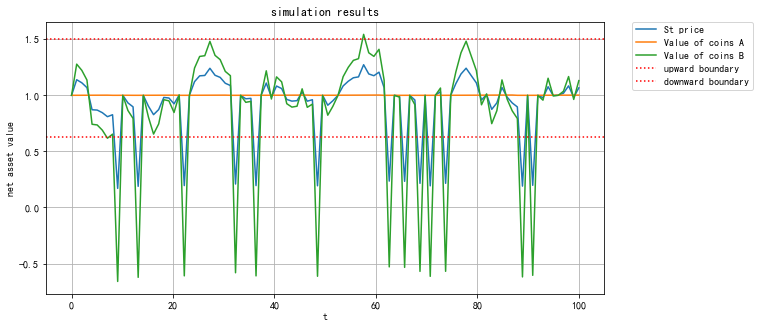

In [16]:
plt.rcParams['figure.figsize'] = (10.0, 5.0)
fig, ax = plt.subplots() 
x = np.linspace(0,100,100) 
ax.plot(x, S, label="St price") 
ax.plot(x, value_a, label="Value of coins A") 
ax.plot(x, value_b, label="Value of coins B") 
ax.set_xlabel('t') 
ax.set_ylabel('net asset value') 
ax.set_title('simulation results') 
plt.axhline(y=1.5,c="r",ls=':',label="upward boundary")
plt.axhline(y=0.625,c="r",ls=':',label="downward boundary")
ax.legend(bbox_to_anchor=(1.05, 0.75), loc=3, borderaxespad=0) 
ax.grid(True)
plt.rcParams['axes.unicode_minus'] = False
plt.show()

## A/B(1:2)

In [17]:
net_value_a=[]
net_value_b=[]
for m in range(10):
    np.random.seed(11)
    BM=[]
    for i in range(100):
        BMs=np.random.normal(0,1,1)
        BM.append(BMs)
    returna=[]
    S0=1
    S=[S0]
    for i in range(99):
        if S0>=5/3+r*i/2:
            returna.append(i)
            S0=1
        elif S0<=0.5+r*i/2:
            returna.append(i)
            S0=1
        else:
            S0=S0*math.exp((r-0.5*sigma*sigma)*t+math.sqrt(t)*sigma*BM[i])
        S.append(S0)
    if returna==[]:
        npv_a=math.exp(-rs*T)*(r*T+1)
        npv_b=0.5*math.exp(-rs*T)*(3*S[99]-0.75-r*T)
    else:
        npv_a_new=[]
        npv_b_new=[]
        num=len(returna)
        if num!=1:
            if S[returna[0]]>=5/3:
                npv_a1=math.exp(-rs*returna[0])*r*returna[0]
                npv_b1=0.5*math.exp(-rs*returna[0])*(3*S[returna[0]]-1-r*returna[0])
            else:
                npv_a1=math.exp(-rs*returna[0])*(r*returna[0]+0.75)
                npv_b1=0
            npv_a_new.append(npv_a1)
            npv_b_new.append(npv_b1)
            for i in range(1,num):
                if S[returna[i]]>=5/3:
                    npv_a1=math.exp(-rs*returna[i])*r*(returna[i]-returna[i-1])
                    npv_b1=0.5*math.exp(-rs*returna[i])*(3*S[returna[i]]-2-r*(returna[i]-returna[i-1]))
                else:
                    npv_a1=math.exp(-r*(returna[i])*(r*(returna[i]-returna[i-1])+0.75))
                    npv_b1=0
                npv_a_new.append(npv_a1)
                npv_b_new.append(npv_b1)
        npv_a=sum(npv_a_new)+(0.25+r*(100-returna[num-1]))*math.exp(-rs*T)
        npv_b=sum(npv_b_new)+(3*S[99]-1-r*(100-returna[num-1]))*math.exp(-rs*T)*0.5
        if num==1:
            if S[returna[0]]>=5/3:
                npv_a1=math.exp(-rs*returna[0])*r*returna[0]
                npv_b1=math.exp(-rs*returna[0])*(3*S[0]-2-r*returna[0])*0.5
            else:
                npv_a1=math.exp(-rs*returna[0])*(r*returna[0]+0.75)
                npv_b1=0
            npv_a_new.append(npv_a1)
            npv_b_new.append(npv_b1)
        npv_a=sum(npv_a_new)+(0.25+r*(100-returna[num-1]))*math.exp(-rs*T)
        npv_b=sum(npv_b_new)+(3*S[99]-1-r*(100-returna[num-1]))*math.exp(-rs*T)*0.5
    net_value_a.append(npv_a)
    net_value_b.append(npv_b)
net_value_a=np.mean(net_value_a)
net_value_b=np.mean(net_value_b)

In [18]:
net_value_a

1.0116701988592773

In [19]:
net_value_b

0.8230059348666074

In [20]:
np.random.seed(11)
BM=[]
for i in range(100):
    BMs=np.random.normal(0,1,1)
    BM.append(BMs)
returna=[]
S0=1
S=[S0]
for i in range(99):
    if S0>=5/3+r*i/2:
        returna.append(i)
        S0=1
    elif S0<=0.5+r*i/2:
        returna.append(i)
        S0=1
    else:
        S0=S0*math.exp((r-0.5*sigma*sigma)*t+math.sqrt(t)*sigma*BM[i])
    S.append(S0)
returna

[]

In [21]:
value_a=[]
for i in range(100):
    avalues=1+r*i
    value_a.append(avalues)
value_b=[]
for i in range(100):
    bvalues=(3*S[i]-value_a[i])/2
    value_b.append(bvalues)

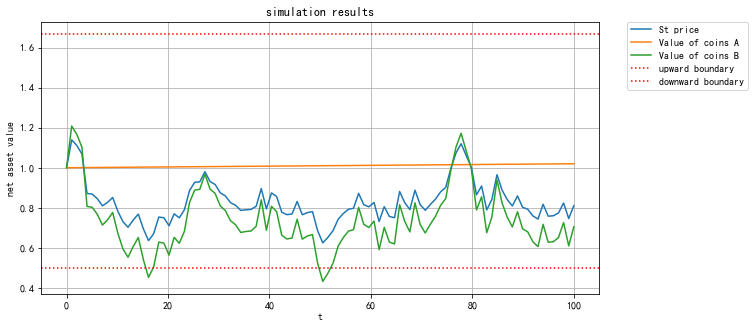

In [22]:
plt.rcParams['figure.figsize'] = (10.0, 5.0)
fig, ax = plt.subplots() 
x = np.linspace(0,100,100) 
ax.plot(x, S, label="St price") 
ax.plot(x, value_a, label="Value of coins A") 
ax.plot(x, value_b, label="Value of coins B") 
ax.set_xlabel('t') 
ax.set_ylabel('net asset value') 
ax.set_title('simulation results') 
plt.axhline(y=5/3,c="r",ls=':',label="upward boundary")
plt.axhline(y=0.5,c="r",ls=':',label="downward boundary")
ax.legend(bbox_to_anchor=(1.05, 0.75), loc=3, borderaxespad=0) 
ax.grid(True)
plt.show()

## A/B 2:1

In [23]:
net_value_a=[]
net_value_b=[]
for m in range(10):
    np.random.seed(11)
    BM=[]
    for i in range(100):
        BMs=np.random.normal(0,1,1)
        BM.append(BMs)
    returna=[]
    S0=1
    S=[S0]
    for i in range(99):
        if S0>=4/3+r*i/2:
            returna.append(i)
            S0=1
        elif S0<=5/6+r*i/2:
            returna.append(i)
            S0=1
        else:
            S0=S0*math.exp((r-0.5*sigma*sigma)*t+math.sqrt(t)*sigma*BM[i])
        S.append(S0)
    if returna==[]:
        npv_a=math.exp(-rs*T)*(r*T+1)
        npv_b=math.exp(-rs*T)*(2*S[99]-1-r*T)
    else:
        npv_a_new=[]
        npv_b_new=[]
        num=len(returna)
        if num!=1:
            if S[returna[0]]>=4/3:
                npv_a1=math.exp(-rs*returna[0])*r*returna[0]
                npv_b1=math.exp(-rs*returna[0])*(3*S[returna[0]]-2-2*r*returna[0])
            else:
                npv_a1=math.exp(-rs*returna[0])*(r*returna[0]+0.75)
                npv_b1=0
            npv_a_new.append(npv_a1)
            npv_b_new.append(npv_b1)
            for i in range(1,num):
                if S[returna[i]]>=4/3:
                    npv_a1=math.exp(-rs*returna[i])*r*(returna[i]-returna[i-1])
                    npv_b1=math.exp(-rs*returna[i])*(3*S[returna[i]]-2-2*r*(returna[i]-returna[i-1]))
                else:
                    npv_a1=math.exp(-r*(returna[i])*(r*(returna[i]-returna[i-1])+0.75))
                    npv_b1=0
                npv_a_new.append(npv_a1)
                npv_b_new.append(npv_b1)
        npv_a=sum(npv_a_new)+(0.25+r*(100-returna[num-1]))*math.exp(-rs*T)
        npv_b=sum(npv_b_new)+(3*S[99]-3-2*r*(100-returna[num-1]))*math.exp(-rs*T)
        if num==1:
            if S[returna[0]]>=4/3:
                npv_a1=math.exp(-rs*returna[0])*r*returna[0]
                npv_b1=math.exp(-rs*returna[0])*(3*S[0]-2-2*r*returna[0])
            else:
                npv_a1=math.exp(-rs*returna[0])*(r*returna[0]+0.75)
                npv_b1=0
            npv_a_new.append(npv_a1)
            npv_b_new.append(npv_b1)
        npv_a=np.mean(npv_a_new)+(0.35+r*(100-returna[num-1]))*math.exp(-rs*T)
        npv_b=np.mean(npv_b_new)+(3*S[99]-2.75-2*r*(100-returna[num-1]))*math.exp(-rs*T)
    net_value_a.append(npv_a)
    net_value_b.append(npv_b)
net_value_a=np.mean(net_value_a)
net_value_b=np.mean(net_value_b)

In [24]:
net_value_a

0.9840826218809549

In [25]:
net_value_b

1.204077773627057

In [26]:
np.random.seed(11)
BM=[]
for i in range(100):
    BMs=np.random.normal(0,1,1)
    BM.append(BMs)
returna=[]
S0=1
S=[S0]
for i in range(99):
    if S0>=4/3+r*i/2:
        returna.append(i)
        S0=1
    elif S0<=5/6+r*i/2:
        returna.append(i)
        S0=1
    else:
        S0=S0*math.exp((r-0.5*sigma*sigma)*t+math.sqrt(t)*sigma*BM[i])
    S.append(S0)
returna

[7, 16, 25, 42, 50, 65, 77, 80, 91]

In [27]:
value_a=[]
for i in range(6):
    avalues=1+r*i
    value_a.append(avalues)
value_a.append(1)
for i in range(8):
    avalues=1+r*i
    value_a.append(avalues)
value_a.append(1)
for i in range(8):
    avalues=1+r*i
    value_a.append(avalues)
value_a.append(1)
for i in range(16):
    avalues=1+r*i
    value_a.append(avalues)
value_a.append(1)
for i in range(7):
    avalues=1+r*i
    value_a.append(avalues)
value_a.append(1)
for i in range(14):
    avalues=1+r*i
    value_a.append(avalues)
value_a.append(1)
for i in range(11):
    avalues=1+r*i
    value_a.append(avalues)
value_a.append(1)
for i in range(2):
    avalues=1+r*i
    value_a.append(avalues)
value_a.append(1)
for i in range(10):
    avalues=1+r*i
    value_a.append(avalues)
value_a.append(1)
for i in range(9):
    avalues=1+r*i
    value_a.append(avalues)
value_b=[]
for i in range(100):
    bvalues=3*S[i]-2*value_a[i]
    value_b.append(bvalues)

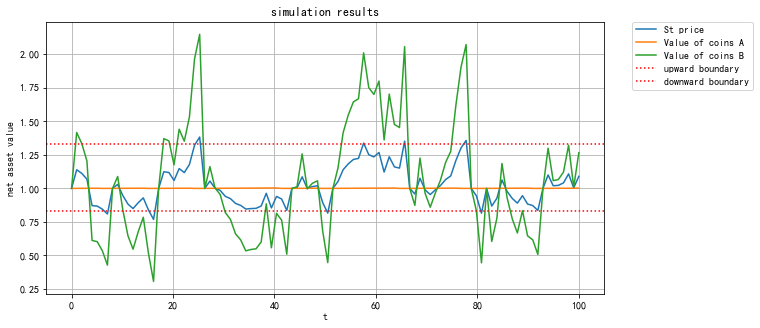

In [28]:
plt.rcParams['figure.figsize'] = (10.0, 5.0)
fig, ax = plt.subplots() 
x = np.linspace(0,100,100) 
ax.plot(x, S, label="St price") 
ax.plot(x, value_a, label="Value of coins A") 
ax.plot(x, value_b, label="Value of coins B") 
ax.set_xlabel('t') 
ax.set_ylabel('net asset value') 
ax.set_title('simulation results') 
plt.axhline(y=4/3,c="r",ls=':',label="upward boundary")
plt.axhline(y=5/6,c="r",ls=':',label="downward boundary")
ax.legend(bbox_to_anchor=(1.05, 0.75), loc=3, borderaxespad=0) 
ax.grid(True)
plt.show()

## boundary condition(upper 2.5 down 0.25)

In [29]:
net_value_a=[]
net_value_b=[]
for m in range(10):
    np.random.seed(11)
    BM=[]
    for i in range(100):
        BMs=np.random.normal(0,1,1)
        BM.append(BMs)
    returna=[]
    S0=1
    S=[S0]
    for i in range(99):
        if S0>=1.75+r*i/2:
            returna.append(i)
            S0=1
        elif S0<=0.625+r*i/2:
            returna.append(i)
            S0=1
        else:
            S0=S0*math.exp((r-0.5*sigma*sigma)*t+math.sqrt(t)*sigma*BM[i])
        S.append(S0)
    if returna==[]:
        npv_a=math.exp(-rs*T)*(r*T+1)
        npv_b=math.exp(-rs*T)*(2*S[99]-1-r*T)
    else:
        npv_a_new=[]
        npv_b_new=[]
        num=len(returna)
        if num!=1:
            if S[returna[0]]>=1.75:
                npv_a1=math.exp(-rs*returna[0])*r*returna[0]
                npv_b1=math.exp(-rs*returna[0])*(2*S[returna[0]]-1-r*returna[0])
            else:
                npv_a1=math.exp(-rs*returna[0])*(r*returna[0]+0.75)
                npv_b1=0
            npv_a_new.append(npv_a1)
            npv_b_new.append(npv_b1)
            for i in range(1,num):
                if S[returna[i]]>=1.75:
                    npv_a1=math.exp(-rs*returna[i])*r*(returna[i]-returna[i-1])
                    npv_b1=math.exp(-rs*returna[i])*(2*S[returna[i]]-2-r*(returna[i]-returna[i-1]))
                else:
                    npv_a1=math.exp(-r*(returna[i])*(r*(returna[i]-returna[i-1])+0.75))
                npv_a_new.append(npv_a1)
                npv_b_new.append(npv_b1)
        npv_a=sum(npv_a_new)+(0.25+r*(100-returna[num-1]))*math.exp(-rs*T)
        npv_b=sum(npv_b_new)+(2*S[99]-1-r*(100-returna[num-1]))*math.exp(-rs*T)
        if num==1:
            if S[returna[0]]>=1.75:
                npv_a1=math.exp(-rs*returna[0])*r*returna[0]
                npv_b1=math.exp(-rs*returna[0])*(2*S[0]-2-r*returna[0])
            else:
                npv_a1=math.exp(-rs*returna[0])*(r*returna[0]+0.75)
                npv_b1=0
            npv_a_new.append(npv_a1)
            npv_b_new.append(npv_b1)
        npv_a=sum(npv_a_new)+(0.25+r*(100-returna[num-1]))*math.exp(-rs*T)
        npv_b=sum(npv_b_new)+(2*S[99]-1.25-r*(100-returna[num-1]))*math.exp(-rs*T)
    net_value_a.append(npv_a)
    net_value_b.append(npv_b)
net_value_a=np.mean(net_value_a)
net_value_b=np.mean(net_value_b)

In [30]:
net_value_a

1.0147670964352338

In [31]:
net_value_b

1.2153634985994022

In [32]:
np.random.seed(11)
BM=[]
for i in range(100):
    BMs=np.random.normal(0,1,1)
    BM.append(BMs)
returna=[]
S0=1
S=[S0]
for i in range(99):
    if S0>=1.75+r*i/2:
        returna.append(i)
        S0=1
    elif S0<=0.625+r*i/2:
        returna.append(i)
        S0=1
    else:
        S0=S0*math.exp((r-0.5*sigma*sigma)*t+math.sqrt(t)*sigma*BM[i])
    S.append(S0)
returna

[50]

In [33]:
value_a=[]
for i in range(49):
    avalues=1+r*i
    value_a.append(avalues)
value_a.append(1)
for i in range(50):
    avalues=1+r*i
    value_a.append(avalues)
value_b=[]
for i in range(100):
    bvalues=2*S[i]-value_a[i]
    value_b.append(bvalues)

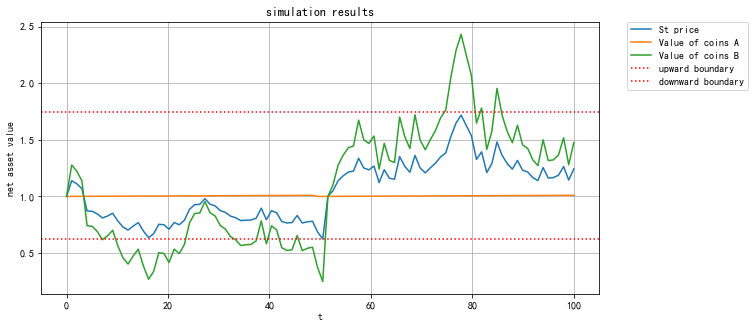

In [34]:
plt.rcParams['figure.figsize'] = (10.0, 5.0)
fig, ax = plt.subplots() 
x = np.linspace(0,100,100) 
ax.plot(x, S, label="St price") 
ax.plot(x, value_a, label="Value of coins A") 
ax.plot(x, value_b, label="Value of coins B") 
ax.set_xlabel('t') 
ax.set_ylabel('net asset value') 
ax.set_title('simulation results') 
plt.axhline(y=1.75,c="r",ls=':',label="upward boundary")
plt.axhline(y=0.625,c="r",ls=':',label="downward boundary")
ax.legend(bbox_to_anchor=(1.05, 0.75), loc=3, borderaxespad=0) 
ax.grid(True)
plt.show()

## boundary condition(upper 2 down 0.1)

In [35]:
net_value_a=[]
net_value_b=[]
for m in range(10):
    np.random.seed(11)
    BM=[]
    for i in range(100):
        BMs=np.random.normal(0,1,1)
        BM.append(BMs)
    returna=[]
    S0=1
    S=[S0]
    for i in range(99):
        if S0>=1.5+r*i/2:
            returna.append(i)
            S0=1
        elif S0<=0.55+r*i/2:
            returna.append(i)
            S0=1
        else:
            S0=S0*math.exp((r-0.5*sigma*sigma)*t+math.sqrt(t)*sigma*BM[i])
        S.append(S0)
    if returna==[]:
        npv_a=math.exp(-rs*T)*(r*T+1)
        npv_b=math.exp(-rs*T)*(2*S[99]-0.5-r*T)
    else:
        npv_a_new=[]
        npv_b_new=[]
        num=len(returna)
        if num!=1:
            if S[returna[0]]>=1.5:
                npv_a1=math.exp(-rs*returna[0])*r*returna[0]
                npv_b1=math.exp(-rs*returna[0])*(2*S[returna[0]]-1-r*returna[0])
            else:
                npv_a1=math.exp(-rs*returna[0])*(r*returna[0]+0.9)
                npv_b1=0
            npv_a_new.append(npv_a1)
            npv_b_new.append(npv_b1)
            for i in range(1,num):
                if S[returna[i]]>=1.5:
                    npv_a1=math.exp(-rs*returna[i])*r*(returna[i]-returna[i-1])
                    npv_b1=math.exp(-rs*returna[i])*(2*S[returna[i]]-2-r*(returna[i]-returna[i-1]))
                else:
                    npv_a1=math.exp(-r*(returna[i])*(r*(returna[i]-returna[i-1])+0.9))
                npv_a_new.append(npv_a1)
                npv_b_new.append(npv_b1)
        npv_a=sum(npv_a_new)+(0.1+r*(100-returna[num-1]))*math.exp(-rs*T)
        npv_b=sum(npv_b_new)+(2*S[99]-1-r*(100-returna[num-1]))*math.exp(-rs*T)
        if num==1:
            if S[returna[0]]>=1.5:
                npv_a1=math.exp(-rs*returna[0])*r*returna[0]
                npv_b1=math.exp(-rs*returna[0])*(2*S[0]-2-r*returna[0])
            else:
                npv_a1=math.exp(-rs*returna[0])*(r*returna[0]+0.9)
                npv_b1=0
            npv_a_new.append(npv_a1)
            npv_b_new.append(npv_b1)
        npv_a=sum(npv_a_new)+(0.1+r*(100-returna[num-1]))*math.exp(-rs*T)
        npv_b=sum(npv_b_new)+(2*S[99]-1-r*(100-returna[num-1]))*math.exp(-rs*T)
    net_value_a.append(npv_a)
    net_value_b.append(npv_b)
net_value_a=np.mean(net_value_a)
net_value_b=np.mean(net_value_b)

In [36]:
net_value_a 

1.0116701988592773

In [37]:
net_value_b

1.090729022966854

In [38]:
np.random.seed(11)
BM=[]
for i in range(100):
    BMs=np.random.normal(0,1,1)
    BM.append(BMs)
returna=[]
S0=1
S=[S0]
for i in range(99):
    if S0>=1.5+r*i/2:
        returna.append(i)
        S0=1
    elif S0<=0.55+r*i/2:
        returna.append(i)
        S0=1
    else:
        S0=S0*math.exp((r-0.5*sigma*sigma)*t+math.sqrt(t)*sigma*BM[i])
    S.append(S0)
returna

[]

In [39]:
value_a=[]
for i in range(100):
    avalues=1+r*i
    value_a.append(avalues)
value_b=[]
for i in range(100):
    bvalues=2*S[i]-value_a[i]
    value_b.append(bvalues)

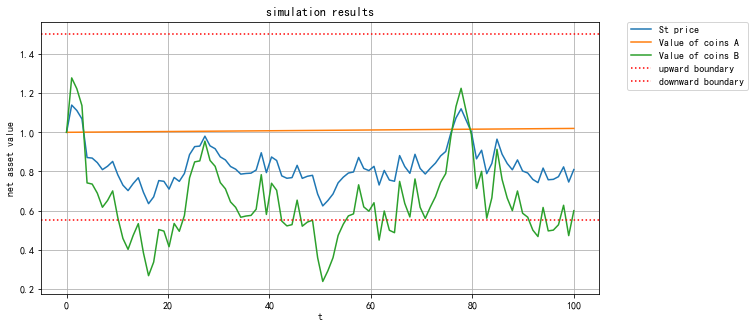

In [40]:
plt.rcParams['figure.figsize'] = (10.0, 5.0)
fig, ax = plt.subplots() 
x = np.linspace(0,100,100) 
ax.plot(x, S, label="St price") 
ax.plot(x, value_a, label="Value of coins A") 
ax.plot(x, value_b, label="Value of coins B") 
ax.set_xlabel('t') 
ax.set_ylabel('net asset value') 
ax.set_title('simulation results') 
plt.axhline(y=1.5,c="r",ls=':',label="upward boundary")
plt.axhline(y=0.55,c="r",ls=':',label="downward boundary")
ax.legend(bbox_to_anchor=(1.05, 0.75), loc=3, borderaxespad=0) 
ax.grid(True)
plt.show()